In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
sns.set_style('whitegrid')
%matplotlib inline

In [28]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [29]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [30]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<AxesSubplot: xlabel='benign_0__mal_1', ylabel='count'>

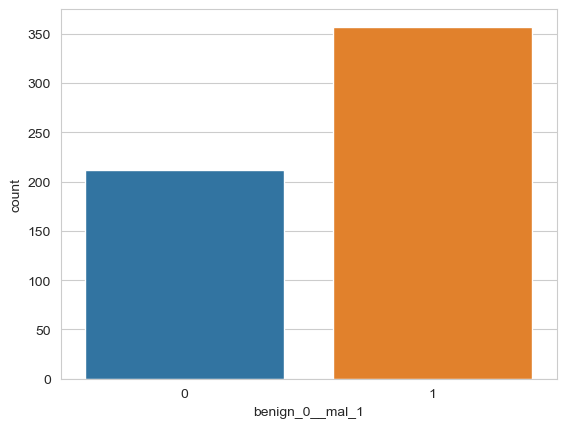

In [32]:
sns.countplot(df, x='benign_0__mal_1')

<AxesSubplot: >

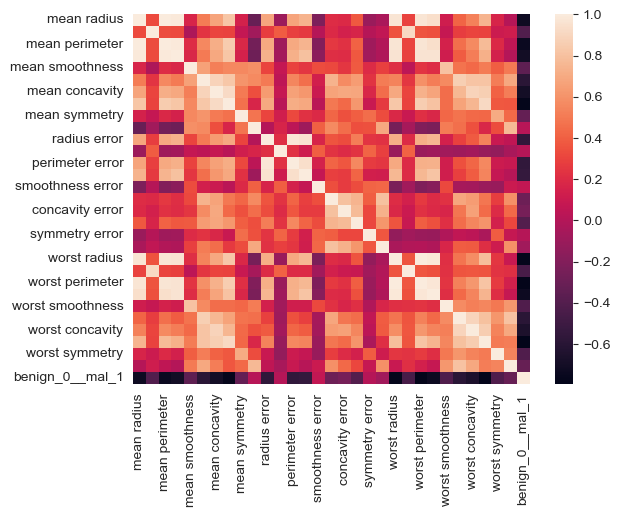

In [33]:
sns.heatmap(df.corr())

In [34]:
df.corr()['benign_0__mal_1'].sort_values()[:-1]

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot: >

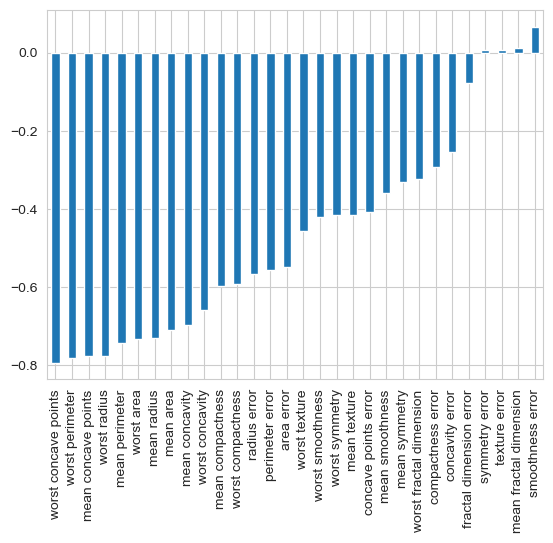

In [35]:
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar')

In [36]:
X = df.drop('benign_0__mal_1', axis=1)
y = df['benign_0__mal_1']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [38]:
scaler = MinMaxScaler()

In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

In [41]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6565 - val_loss: 0.6325
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6075 - val_loss: 0.5888
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5649 - val_loss: 0.5449
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5216 - val_loss: 0.4970
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4732 - val_loss: 0.4464
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4249 - val_loss: 0.3981
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3814 - val_loss: 0.3554
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3420 - val_loss: 0.3146
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3099 - val_loss: 0.2824
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2790 - val_loss: 0.2616
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0497 - val_loss: 0.1292
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0539 - val_loss: 0.1147
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0514 - val_loss: 0.1188
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0491 - val_loss: 0.1211
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0484 - val_loss: 0.1136
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0510 - val_loss: 0.1207
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0511 - val_loss: 0.1138
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.1084
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0639 - val_loss: 0.1192
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0587 - val_loss: 0.1108
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0361 - val_loss: 0.1140
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0352 - val_loss: 0.1301
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0354 - val_loss: 0.1226
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0350 - val_loss: 0.1302
Epoch 168/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0335 - val_loss: 0.1214
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0337 - val_loss: 0.1280
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0348 - val_loss: 0.1224
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0328 - val_loss: 0.1314
Epoch 172/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0362 - val_loss: 0.1223
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0335 - val_loss: 0.1303
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0229 - val_loss: 0.1489
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0230 - val_loss: 0.1547
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0232 - val_loss: 0.1411
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0224 - val_loss: 0.1674
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0250 - val_loss: 0.1446
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0238 - val_loss: 0.1740
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0240 - val_loss: 0.1496
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0212 - val_loss: 0.1449
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0264 - val_loss: 0.1728
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.1427
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0147 - val_loss: 0.2018
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0128 - val_loss: 0.1865
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.1862
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.2096
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0155 - val_loss: 0.1697
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0225 - val_loss: 0.2307
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0154 - val_loss: 0.1850
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 0.1852
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0144 - val_loss: 0.2141
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0137 - val_loss: 0.1760
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.2543
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0072 - val_loss: 0.2375
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.2527
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.2411
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.2599
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.2443
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.2467
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.2536
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0069 - val_loss: 0.2648
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.2572
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.3228
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.3211
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.3288
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.3196
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.3162
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.3408
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.3366
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.3200
Epoch 496/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.3472
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.3139
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.4169
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.4167
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.4251
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.4265
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.3991
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.4500
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.4222
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.4322
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.4280
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.4317
Epoc

In [42]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot: >

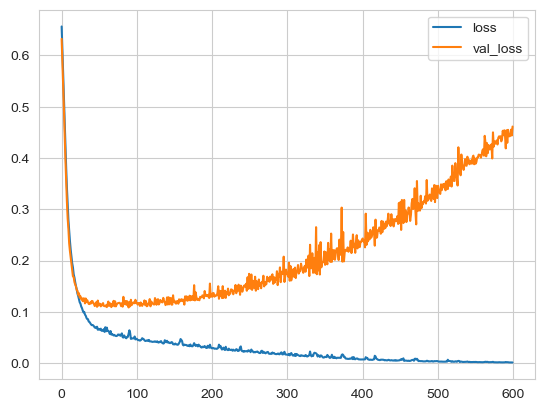

In [43]:
model_loss.plot()

In [44]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [45]:
early_stop = EarlyStopping(monitor='val_loss', patience=25, mode='min', verbose=1)

In [46]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=600, callbacks=[early_stop], verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6753 - val_loss: 0.6613
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6402 - val_loss: 0.6241
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5991 - val_loss: 0.5815
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5543 - val_loss: 0.5300
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5021 - val_loss: 0.4757
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4493 - val_loss: 0.4203
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3977 - val_loss: 0.3682
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3517 - val_loss: 0.3232
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3116 - val_loss: 0.2897
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2862 - val_loss: 0.2600
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0541 - val_loss: 0.1178
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0559 - val_loss: 0.1156
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0538 - val_loss: 0.1204
Epoch 85: early stopping


In [47]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot: >

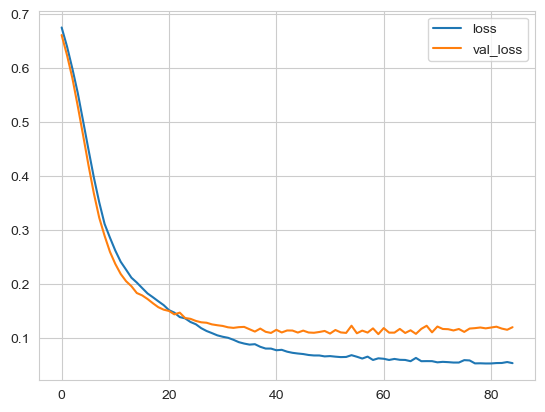

In [48]:
model_loss.plot()

In [49]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [50]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=600, callbacks=[early_stop], verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.7090 - val_loss: 0.6901
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6822 - val_loss: 0.6688
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6677 - val_loss: 0.6473
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6562 - val_loss: 0.6222
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6451 - val_loss: 0.5983
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6118 - val_loss: 0.5714
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5883 - val_loss: 0.5491
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5772 - val_loss: 0.5215
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5561 - val_loss: 0.4930
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5403 - val_loss: 0.4671
Epoch 11

14/14 [==============================] - 0s 2ms/step - loss: 0.1070 - val_loss: 0.0838
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0864 - val_loss: 0.0812
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1266 - val_loss: 0.0809
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0983 - val_loss: 0.0778
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1163 - val_loss: 0.0963
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0982 - val_loss: 0.0761
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1116 - val_loss: 0.0756
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0895 - val_loss: 0.0840
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0894 - val_loss: 0.0820
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1214 - val_loss: 0.0985
Epoch 93/600


<AxesSubplot: >

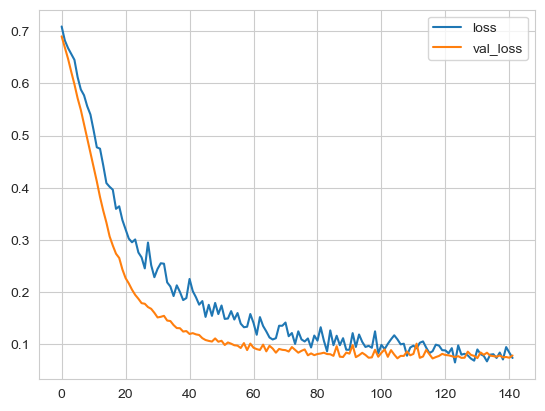

In [51]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [53]:
# multiclass: 
# predictions = np.argmax(model.predict(X_test), axis=-1)
predictions = (model.predict(X_test)>.5).astype('int32')
predictions

5/5 [==============================] - 0s 883us/step


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [54]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[54  1]
 [ 2 86]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

